In [28]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import numpy as np
import joblib  # for saving models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from xgboost import XGBClassifier

In [1]:
import pandas as pd
import numpy as np
import joblib  # for saving models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read in the cleaned dataset and drop non-numeric features
def read_cleaned_data(filepath):
    data = pd.read_csv(filepath)
    data_numeric = data.drop(['song', 'artist', 'song_artist'], axis=1)
    return data_numeric

# Prepare features and target variable
def prepare_data_for_modeling(data_numeric, target_column):
    X = data_numeric.drop(target_column, axis=1)
    y = data_numeric[target_column]
    column_names = X.columns.tolist()
    return X, y, column_names

#b Split the dataset into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Feature scaling
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Function to save test data with column names
def save_test_data(X_test_scaled, y_test, column_names, X_test_filepath, y_test_filepath):
    X_test_df = pd.DataFrame(X_test_scaled, columns=column_names)
    X_test_df.to_csv(X_test_filepath, index=False)
    y_test.to_csv(y_test_filepath, index=False)

# Function to save pre-trained models for easier testing 
def save_model(model, filename):
    joblib.dump(model, filename)

# Model 1 Training - Logistic Regression
def train_and_save_logistic_regression(X_train_scaled, y_train, filename='../models/logistic_regression_model.pkl'):
    model_lr = LogisticRegression()
    model_lr.fit(X_train_scaled, y_train)
    save_model(model_lr, filename)
    return model_lr

# Model 2 Training - Random Forest
def train_and_save_random_forest(X_train_scaled, y_train, filename='../models/random_forest_model.pkl'):
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train_scaled, y_train)
    save_model(model_rf, filename)
    return model_rf

# Model 3 Training - k-Nearest Neighbor
def train_and_save_knn(X_train_scaled, y_train, filename='../models/knn_model.pkl'):
    model_knn = KNeighborsClassifier()
    model_knn.fit(X_train_scaled, y_train)
    save_model(model_knn, filename)
    return model_knn

# Model 4 Training - XGBoost
def train_and_save_xgboost(X_train_scaled, y_train, filename='../models/xgboost_model.pkl'):
    model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model_xgb.fit(X_train_scaled, y_train)
    save_model(model_xgb, filename)
    return model_xgb


    
# Main pipeline execution
def main():
    # Assuming `data_filepath` and `target_column` are defined and the dataset is clean
    data_numeric = read_cleaned_data('../data/final/modeling_dataset_32k.csv')
    X, y, column_names = prepare_data_for_modeling(data_numeric, 'hit_song')
    X_train, X_test, y_train, y_test = split_data(X, y)
    X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
    save_test_data(X_test_scaled, y_test, column_names,'../data/final/X_test_scaled.csv','../data/final/y_test.csv')

    # Train and save each model
    models = {
        'logistic_regression': train_and_save_logistic_regression,
        'random_forest': train_and_save_random_forest,
        'knn': train_and_save_knn,
        'xgboost': train_and_save_xgboost
    }

    for name, train_func in models.items():
        print(f"Train and save {name} model")
        model = train_func(X_train_scaled, y_train)
        evaluate_model(model, X_test_scaled, y_test)
        # Optionally, add a line here to plot or further analyze model performance

if __name__ == '__main__':
    main()

Train and save logistic_regression model
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.60      0.69      3229
           1       0.68      0.85      0.76      3268

    accuracy                           0.73      6497
   macro avg       0.74      0.73      0.72      6497
weighted avg       0.74      0.73      0.72      6497

Confusion Matrix:
[[1946 1283]
 [ 488 2780]]
Train and save random_forest model
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      3229
           1       0.74      0.85      0.79      3268

    accuracy                           0.77      6497
   macro avg       0.78      0.77      0.77      6497
weighted avg       0.78      0.77      0.77      6497

Confusion Matrix:
[[2226 1003]
 [ 481 2787]]
Train and save knn model
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.

C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75      3229
           1       0.74      0.85      0.79      3268

    accuracy                           0.77      6497
   macro avg       0.78      0.77      0.77      6497
weighted avg       0.78      0.77      0.77      6497

Confusion Matrix:
[[2250  979]
 [ 504 2764]]


Train and save logistic_regression model
Plot Learning Curve:


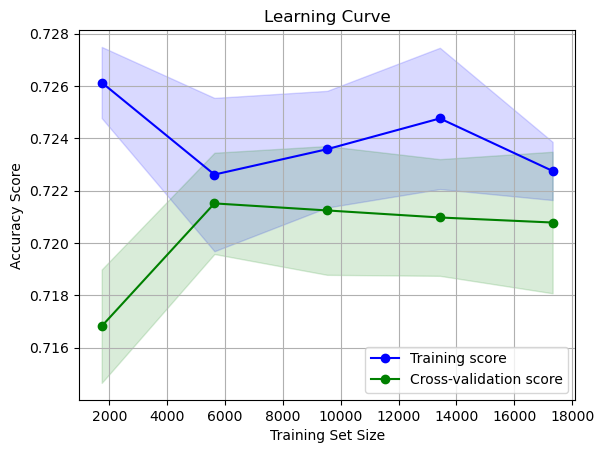

None
Train and save random_forest model
Best parameters from Randomized Search: {'n_estimators': 600, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 30, 'bootstrap': False}
Best score from Randomized Search: 0.7708469479374694
Plot Learning Curve:


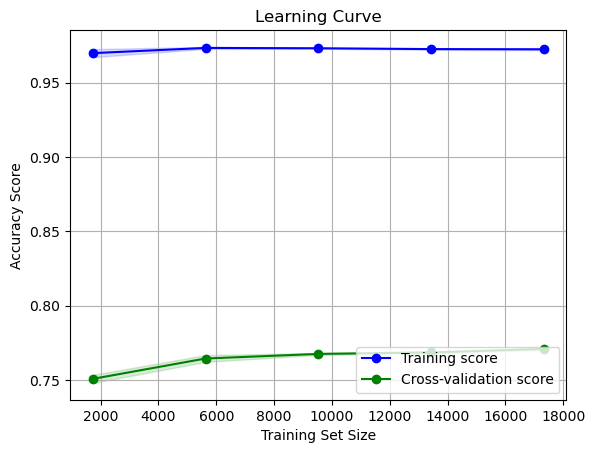

None
Train and save knn model
Plot Learning Curve:


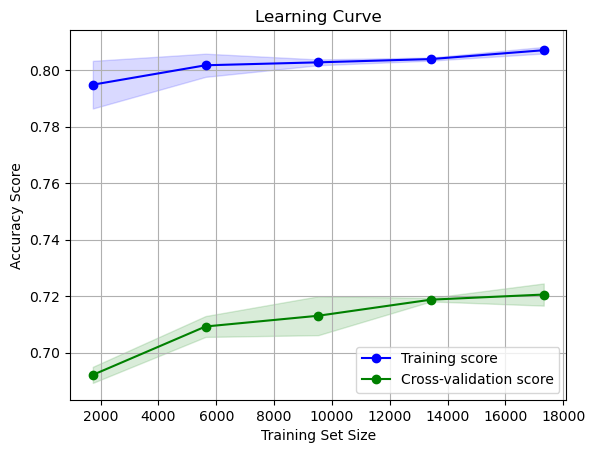

None
Train and save xgboost model
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters from Randomized Search: {'subsample': 0.6, 'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best score from Randomized Search: 0.7755031014622379
Plot Learning Curve:


C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Linds\anaconda3\lib\site-packages\xgboost\sklearn.p

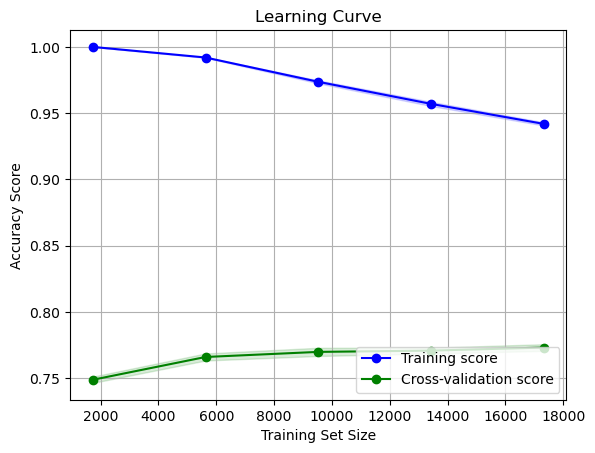

None


In [19]:
import pandas as pd
import numpy as np
import joblib  # for saving models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read in the cleaned dataset and drop non-numeric features
def read_cleaned_data(filepath):
    data = pd.read_csv(filepath)
    data_numeric = data.drop(['song', 'artist', 'song_artist'], axis=1)
    return data_numeric

# Prepare features and target variable
def prepare_data_for_modeling(data_numeric, target_column):
    X = data_numeric.drop(target_column, axis=1)
    y = data_numeric[target_column]
    column_names = X.columns.tolist()
    return X, y, column_names

# Split the dataset into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Feature scaling
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Function to save training data with column names
def save_train_data(X_train_scaled, y_train, column_names, X_train_filepath, y_train_filepath):
    X_train_df = pd.DataFrame(X_train_scaled, columns=column_names)
    X_train_df.to_csv(X_train_filepath, index=False)
    y_train.to_csv(y_train_filepath, index=False)
    
# Function to save test data with column names
def save_test_data(X_test_scaled, y_test, column_names, X_test_filepath, y_test_filepath):
    X_test_df = pd.DataFrame(X_test_scaled, columns=column_names)
    X_test_df.to_csv(X_test_filepath, index=False)
    y_test.to_csv(y_test_filepath, index=False)

# Function to save pre-trained models for easier testing 
def save_model(model, filename):
    joblib.dump(model, filename)

# Model 1 Training - Logistic Regression
def train_and_save_logistic_regression(X_train_scaled, y_train, filename='../models/logistic_regression_model.pkl'):
    model_lr = LogisticRegression()
    model_lr.fit(X_train_scaled, y_train)
    save_model(model_lr, filename)
    return model_lr



# Model 2 Training - Random Forest
def train_and_save_random_forest(X_train_scaled, y_train, filename='../models/random_forest_model.pkl', cv=3):
    # First, conduct a Randomized Search to narrow down the parameter space
    param_distributions = {'n_estimators': np.arange(100, 1001, 100), 
        'max_depth': [None] + list(np.arange(5, 51, 5)),  
        'min_samples_split': np.arange(2, 11, 1),  
        'min_samples_leaf': np.arange(1, 11, 1),  
        'bootstrap': [True, False]} 
    rf_model_random = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=rf_model_random,
        param_distributions= param_distributions,
        n_iter=8,
        cv=cv,
        random_state=42,
        n_jobs=-1)
    random_search.fit(X_train_scaled, y_train)
    best_rf_model = random_search.best_estimator_
    
    save_model(best_rf_model, filename)
    
    print("Best parameters from Randomized Search:", random_search.best_params_)
    print("Best score from Randomized Search:", random_search.best_score_)
    
    return best_rf_model

# Model 3 Training - k-Nearest Neighbor
def train_and_save_knn(X_train_scaled, y_train, filename='../models/knn_model.pkl'):
    model_knn = KNeighborsClassifier()
    model_knn.fit(X_train_scaled, y_train)
    save_model(model_knn, filename)
    return model_knn


from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Model 4 Training and Hyperparameter tuning - XGBoost
def train_and_save_xgboost(X_train_scaled, y_train, filename='../models/xgboost_model.pkl', cv=3, n_iter=8, random_state=42):
    param_dist = {'n_estimators': np.arange(50, 300, 50),
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': np.arange(3, 10, 2),
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]}
    
    xgb_clf = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
    
    random_search = RandomizedSearchCV(
        estimator=xgb_clf,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=cv,
        verbose=1,
        n_jobs=-1,
        random_state=random_state)
    
    random_search.fit(X_train_scaled, y_train)
    best_xgb_model = random_search.best_estimator_
    
    save_model(best_xgb_model, filename)
    
    # Print the best parameters and score
    print("Best parameters from Randomized Search:", random_search.best_params_)
    print("Best score from Randomized Search:", random_search.best_score_)
    
    return best_xgb_model

def plot_learning_curve(model, X_train_scaled, y_train, cv=3, scoring='accuracy', title='Learning Curve'):
    train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_scaled, y_train, train_sizes=train_sizes, cv=cv, scoring=scoring
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)
    
    plt.plot(train_sizes, val_mean, label='Cross-validation score', color='green', marker='o')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.15)
    
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Main pipeline execution
def main():
    data_numeric = read_cleaned_data('../data/final/modeling_dataset_32k.csv')
    X, y, column_names = prepare_data_for_modeling(data_numeric, 'hit_song')
    X_train, X_test, y_train, y_test = split_data(X, y)
    X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
    save_train_data(X_test_scaled, y_test, column_names,'../data/final/X_train_scaled.csv','../data/final/y_train.csv')
    save_test_data(X_test_scaled, y_test, column_names,'../data/final/X_test_scaled.csv','../data/final/y_test.csv')

    # Train and save each model
    models = {
        'logistic_regression': train_and_save_logistic_regression,
        'random_forest': train_and_save_random_forest,
        'knn': train_and_save_knn,
        'xgboost': train_and_save_xgboost}

    for name, train_function in models.items():
        print(f"Train and save {name} model")
        model = train_function(X_train_scaled, y_train)
        print("Plot Learning Curve:")
        print(plot_learning_curve(model, X_train_scaled, y_train, cv=3, scoring='accuracy', title='Learning Curve'))


if __name__ == '__main__':
    main()

Evaluate LogisticRegression() model
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.60      0.69      3229
           1       0.68      0.85      0.76      3268

    accuracy                           0.73      6497
   macro avg       0.74      0.73      0.72      6497
weighted avg       0.74      0.73      0.72      6497

Confusion Matrix Results:


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


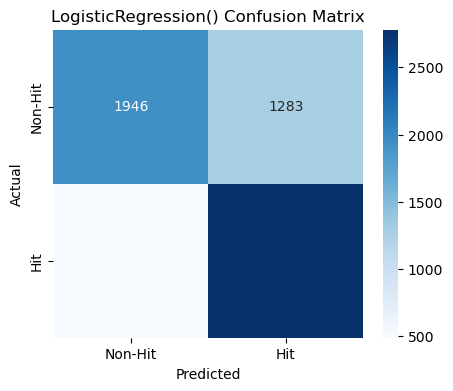

None
Precision-Recall Curve:


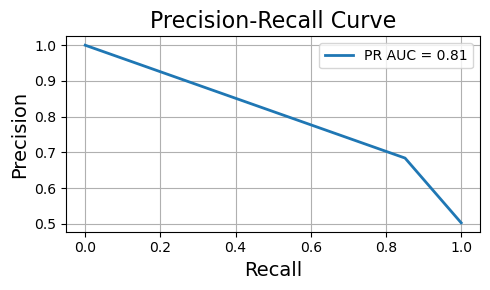

None
Feature Importance Results:
Logistic Regression - Using coef_ for feature importance.
             Feature  Importance
3           loudness    0.187062
0       danceability    0.088533
9            valence    0.032401
4               mode    0.024169
12    time_signature    0.020769
10             tempo    0.005217
2                key    0.004526
11       duration_ms   -0.012319
8           liveness   -0.015611
5        speechiness   -0.046083
13              year   -0.049745
6       acousticness   -0.105817
1             energy   -0.127362
7   instrumentalness   -0.280386
None
Evaluate RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=6,
                       min_samples_split=6, n_estimators=600, random_state=42) model


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      3229
           1       0.73      0.86      0.79      3268

    accuracy                           0.77      6497
   macro avg       0.78      0.77      0.77      6497
weighted avg       0.78      0.77      0.77      6497

Confusion Matrix Results:


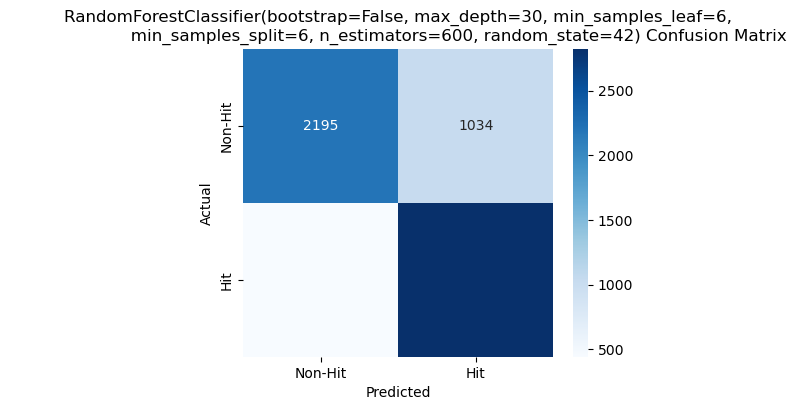

None
Precision-Recall Curve:


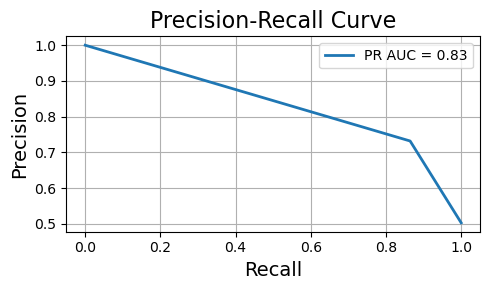

None
Feature Importance Results:
Tree-based Model - Using feature_importances_ for feature importance.
             Feature  Importance
7   instrumentalness    0.242766
6       acousticness    0.119845
3           loudness    0.097657
1             energy    0.094325
11       duration_ms    0.081875
0       danceability    0.079176
9            valence    0.063840
5        speechiness    0.056197
13              year    0.051355
8           liveness    0.041221
10             tempo    0.040595
2                key    0.019497
4               mode    0.006302
12    time_signature    0.005349
None
Evaluate KNeighborsClassifier() model


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.63      0.69      3229
           1       0.69      0.82      0.75      3268

    accuracy                           0.73      6497
   macro avg       0.73      0.72      0.72      6497
weighted avg       0.73      0.73      0.72      6497

Confusion Matrix Results:


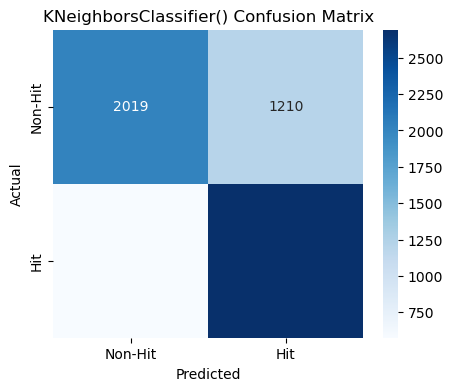

None
Precision-Recall Curve:


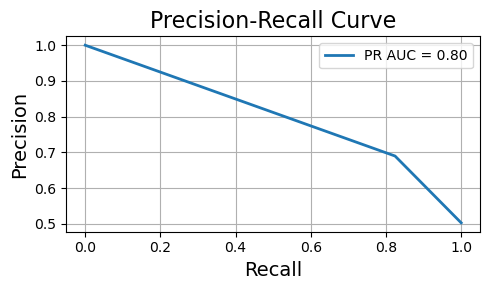

None
Feature Importance Results:
KNeighborsClassifier does not provide feature importance.
None
Evaluate XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...) model
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      3229
    

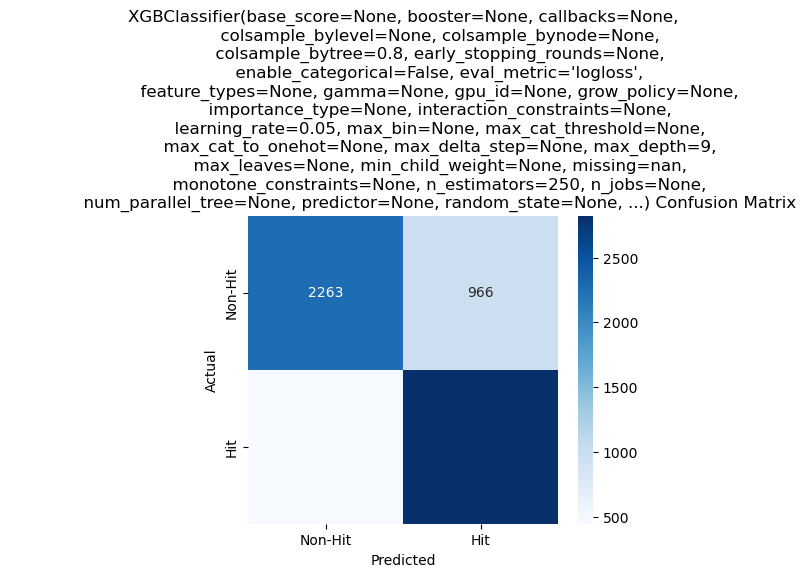

None
Precision-Recall Curve:


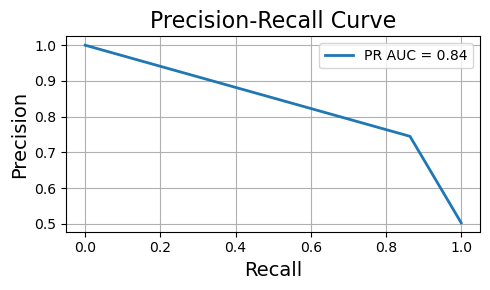

None
Feature Importance Results:
Tree-based Model - Using feature_importances_ for feature importance.
             Feature  Importance
7   instrumentalness    0.231306
6       acousticness    0.088865
3           loudness    0.069644
11       duration_ms    0.067895
1             energy    0.063161
13              year    0.062340
0       danceability    0.061486
12    time_signature    0.060489
5        speechiness    0.055767
4               mode    0.055053
9            valence    0.052940
8           liveness    0.046444
10             tempo    0.044747
2                key    0.039863
None


In [1]:
import pandas as pd
import numpy as np
import joblib  # for saving models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read in test data
def read_split_data(filepath_xtrain, filepath_xtest, filepath_ytrain, filepath_ytest):
    X_train_scaled = pd.read_csv(filepath_xtrain)
    X_test_scaled = pd.read_csv(filepath_xtest)
    y_train = pd.read_csv(filepath_ytrain).squeeze()
    y_test = pd.read_csv(filepath_ytest).squeeze()
    return X_train_scaled, X_test_scaled, y_train, y_test

def load_pretrained_models(lr_filepath, rf_filepath, knn_filepath, xgb_filepath):
    logistic_regression = joblib.load(lr_filepath)
    random_forest = joblib.load(rf_filepath)
    knn = joblib.load(knn_filepath)
    xgboost = joblib.load(xgb_filepath)
    return logistic_regression, random_forest, knn, xgboost

def plot_confusion_matrix(y_test, predictions, model, labels=['Non-Hit', 'Hit']):
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_precision_recall_curve(y_test, predictions, title='Precision-Recall Curve'):
    precision, recall, thresholds = precision_recall_curve(y_test, predictions)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(5, 3))
    plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', linewidth=2)
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

    
def print_feature_importance(model, column_names):
    # Logistic regression has coefficients
    if hasattr(model, 'coef_'):
        print("Logistic Regression - Using coef_ for feature importance.")
        importance = model.coef_[0] / np.sum(np.abs(model.coef_[0]))
        feature_importance_df = pd.DataFrame({
            'Feature': column_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        print(feature_importance_df)
    # RandomForest and XGBoost have feature importance
    elif hasattr(model, 'feature_importances_'):
        print("Tree-based Model - Using feature_importances_ for feature importance.")
        importance = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': column_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        print(feature_importance_df)
    # KNN doesn't have extractable feature importance
    else:
        print(f"{type(model).__name__} does not provide feature importance.")

    
def evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, column_names):
    predictions = model.predict(X_test_scaled)
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix Results:")
    print(plot_confusion_matrix(y_test, predictions, model, labels=['Non-Hit', 'Hit']))
    print("Precision-Recall Curve:")
    print(plot_precision_recall_curve(y_test, predictions, title='Precision-Recall Curve'))
    print('Feature Importance Results:')
    print(print_feature_importance(model, column_names))  

    
# Main pipeline execution
def main():
    X_train_scaled, X_test_scaled, y_train, y_test = read_split_data('../data/final/X_train_scaled.csv',
                                                                     '../data/final/X_test_scaled.csv', 
                                                                     '../data/final/y_train.csv',
                                                                     '../data/final/y_test.csv' )
    
    logistic_regression, random_forest, knn, xgboost = load_pretrained_models('../models/logistic_regression_model.pkl',
                                                                                '../models/random_forest_model.pkl', 
                                                                                '../models/knn_model.pkl',
                                                                                '../models/xgboost_model.pkl')
    column_names = (pd.read_csv('../data/final/X_test_scaled.csv')).columns.tolist()
    models = [logistic_regression, random_forest, knn, xgboost]
    for model in models:
        print(f"Evaluate {model} model")
        evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, column_names)

if __name__ == '__main__':
    main()

Evaluate LogisticRegression() model
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.60      0.69      3229
           1       0.68      0.85      0.76      3268

    accuracy                           0.73      6497
   macro avg       0.74      0.73      0.72      6497
weighted avg       0.74      0.73      0.72      6497

Confusion Matrix Results:


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


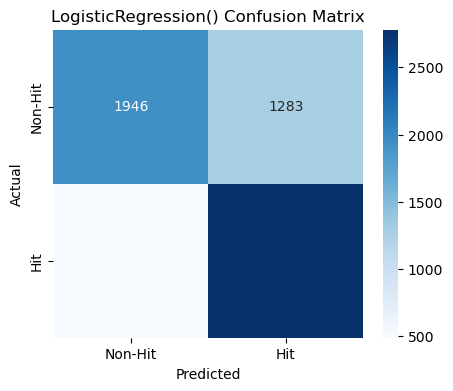

None
Precision-Recall Curve:


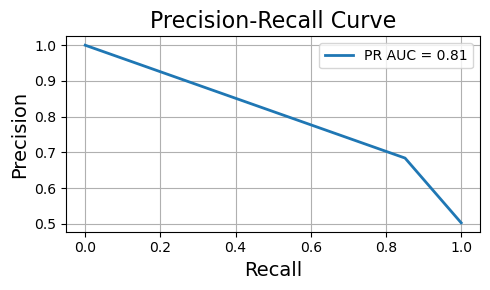

None
Feature Importance Results:
Logistic Regression - Using coef_ for feature importance.
             Feature  Importance
3           loudness    0.187062
0       danceability    0.088533
9            valence    0.032401
4               mode    0.024169
12    time_signature    0.020769
10             tempo    0.005217
2                key    0.004526
11       duration_ms   -0.012319
8           liveness   -0.015611
5        speechiness   -0.046083
13              year   -0.049745
6       acousticness   -0.105817
1             energy   -0.127362
7   instrumentalness   -0.280386
None
Evaluate RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=6,
                       min_samples_split=6, n_estimators=600, random_state=42) model


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      3229
           1       0.73      0.86      0.79      3268

    accuracy                           0.77      6497
   macro avg       0.78      0.77      0.77      6497
weighted avg       0.78      0.77      0.77      6497

Confusion Matrix Results:


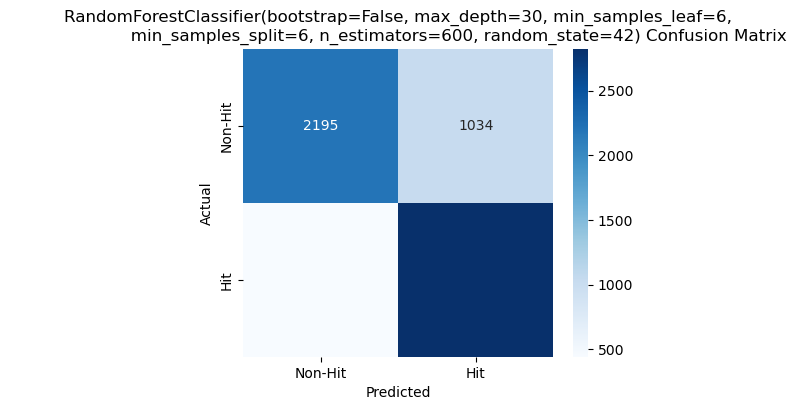

None
Precision-Recall Curve:


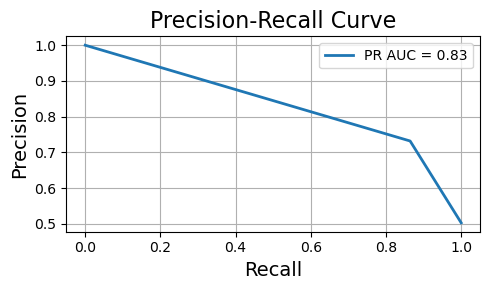

None
Feature Importance Results:
Tree-based Model - Using feature_importances_ for feature importance.
             Feature  Importance
7   instrumentalness    0.242766
6       acousticness    0.119845
3           loudness    0.097657
1             energy    0.094325
11       duration_ms    0.081875
0       danceability    0.079176
9            valence    0.063840
5        speechiness    0.056197
13              year    0.051355
8           liveness    0.041221
10             tempo    0.040595
2                key    0.019497
4               mode    0.006302
12    time_signature    0.005349
None
Evaluate KNeighborsClassifier() model


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.63      0.69      3229
           1       0.69      0.82      0.75      3268

    accuracy                           0.73      6497
   macro avg       0.73      0.72      0.72      6497
weighted avg       0.73      0.73      0.72      6497

Confusion Matrix Results:


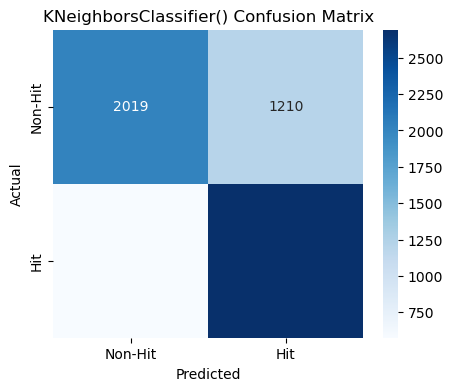

None
Precision-Recall Curve:


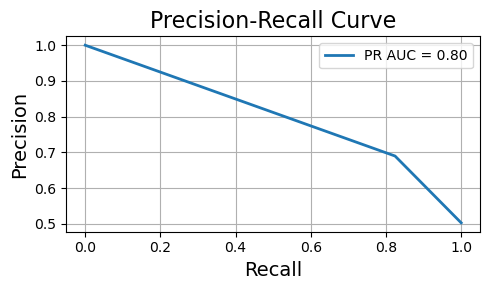

None
Feature Importance Results:
KNeighborsClassifier does not provide feature importance.
None
Evaluate XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...) model
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      3229
    

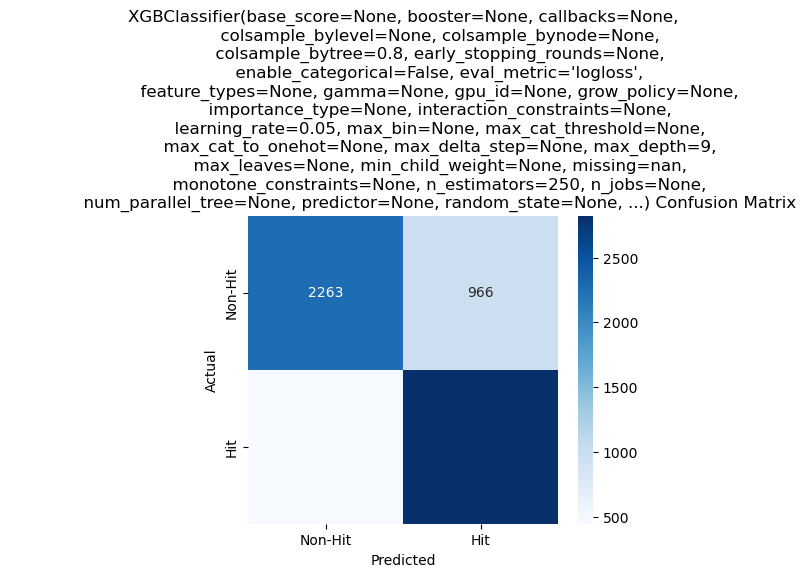

None
Precision-Recall Curve:


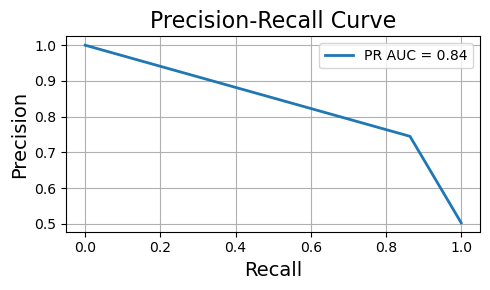

None
Feature Importance Results:
Tree-based Model - Using feature_importances_ for feature importance.
             Feature  Importance
7   instrumentalness    0.231306
6       acousticness    0.088865
3           loudness    0.069644
11       duration_ms    0.067895
1             energy    0.063161
13              year    0.062340
0       danceability    0.061486
12    time_signature    0.060489
5        speechiness    0.055767
4               mode    0.055053
9            valence    0.052940
8           liveness    0.046444
10             tempo    0.044747
2                key    0.039863
None


In [27]:
import pandas as pd
import numpy as np
import joblib  # for saving models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read in test data
def read_split_data(filepath_xtest, filepath_ytest):
    X_test_scaled = pd.read_csv(filepath_xtest)
    y_test = pd.read_csv(filepath_ytest).squeeze()
    return X_test_scaled, y_test

def load_pretrained_models(lr_filepath, rf_filepath, knn_filepath, xgb_filepath):
    logistic_regression = joblib.load(lr_filepath)
    random_forest = joblib.load(rf_filepath)
    knn = joblib.load(knn_filepath)
    xgboost = joblib.load(xgb_filepath)
    return logistic_regression, random_forest, knn, xgboost

def plot_confusion_matrix(y_test, predictions, model, labels=['Non-Hit', 'Hit']):
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_precision_recall_curve(y_test, predictions, title='Precision-Recall Curve'):
    precision, recall, thresholds = precision_recall_curve(y_test, predictions)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(5, 3))
    plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', linewidth=2)
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def print_feature_importance(model, column_names):
    # Logistic regression has coefficients
    if hasattr(model, 'coef_'):
        print("Logistic Regression - Using coef_ for feature importance.")
        importance = model.coef_[0] / np.sum(np.abs(model.coef_[0]))
        feature_importance_df = pd.DataFrame({
            'Feature': column_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        print(feature_importance_df)
    # RandomForest and XGBoost have feature importance
    elif hasattr(model, 'feature_importances_'):
        print("Tree-based Model - Using feature_importances_ for feature importance.")
        importance = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': column_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        print(feature_importance_df)
    # KNN doesn't have extractable feature importance
    else:
        print(f"{type(model).__name__} does not provide feature importance.")

    
def evaluate_model(model, X_test_scaled, y_test, column_names):
    predictions = model.predict(X_test_scaled)
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix Results:")
    print(plot_confusion_matrix(y_test, predictions, model, labels=['Non-Hit', 'Hit']))
    print("Precision-Recall Curve:")
    print(plot_precision_recall_curve(y_test, predictions, title='Precision-Recall Curve'))
    print('Feature Importance Results:')
    print(print_feature_importance(model, column_names))  

    
# Main pipeline execution
def main():
    X_test_scaled, y_test = read_split_data('../data/final/X_test_scaled.csv', 
                                                                     '../data/final/y_test.csv' )
    
    logistic_regression, random_forest, knn, xgboost = load_pretrained_models('../models/logistic_regression_model.pkl',
                                                                                '../models/random_forest_model.pkl', 
                                                                                '../models/knn_model.pkl',
                                                                                '../models/xgboost_model.pkl')
    column_names = (pd.read_csv('../data/final/X_test_scaled.csv')).columns.tolist()
    models = [logistic_regression, random_forest, knn, xgboost]
    for model in models:
        print(f"Evaluate {model} model")
        evaluate_model(model, X_test_scaled, y_test, column_names)

if __name__ == '__main__':
    main()

Evaluate LogisticRegression() model
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.60      0.69      3229
           1       0.68      0.85      0.76      3268

    accuracy                           0.73      6497
   macro avg       0.74      0.73      0.72      6497
weighted avg       0.74      0.73      0.72      6497

Confusion Matrix Results:


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


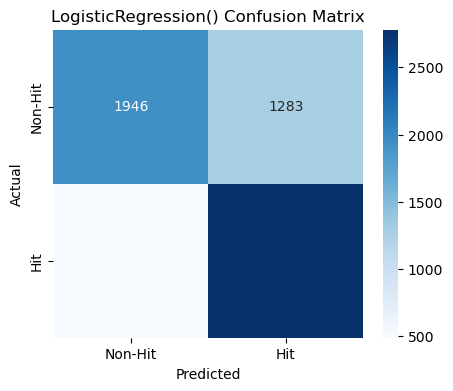

None
Precision-Recall Curve:


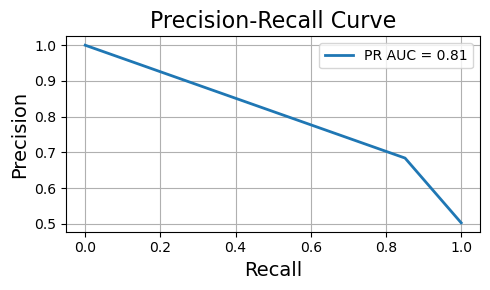

None
Feature Importance Results:
Logistic Regression - Using coef_ for feature importance.
             Feature  Importance
3           loudness    0.187062
0       danceability    0.088533
9            valence    0.032401
4               mode    0.024169
12    time_signature    0.020769
10             tempo    0.005217
2                key    0.004526
11       duration_ms   -0.012319
8           liveness   -0.015611
5        speechiness   -0.046083
13              year   -0.049745
6       acousticness   -0.105817
1             energy   -0.127362
7   instrumentalness   -0.280386
None
Evaluate RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=6,
                       min_samples_split=6, n_estimators=600, random_state=42) model


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      3229
           1       0.73      0.86      0.79      3268

    accuracy                           0.77      6497
   macro avg       0.78      0.77      0.77      6497
weighted avg       0.78      0.77      0.77      6497

Confusion Matrix Results:


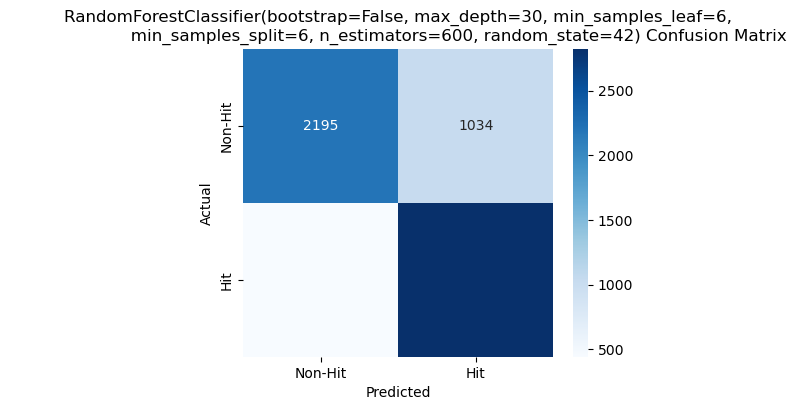

None
Precision-Recall Curve:


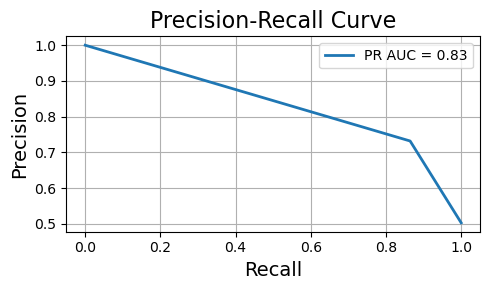

None
Feature Importance Results:
Tree-based Model - Using feature_importances_ for feature importance.
             Feature  Importance
7   instrumentalness    0.242766
6       acousticness    0.119845
3           loudness    0.097657
1             energy    0.094325
11       duration_ms    0.081875
0       danceability    0.079176
9            valence    0.063840
5        speechiness    0.056197
13              year    0.051355
8           liveness    0.041221
10             tempo    0.040595
2                key    0.019497
4               mode    0.006302
12    time_signature    0.005349
None
Evaluate KNeighborsClassifier() model


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.63      0.69      3229
           1       0.69      0.82      0.75      3268

    accuracy                           0.73      6497
   macro avg       0.73      0.72      0.72      6497
weighted avg       0.73      0.73      0.72      6497

Confusion Matrix Results:


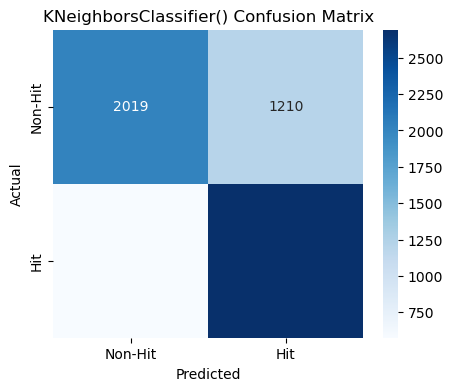

None
Precision-Recall Curve:


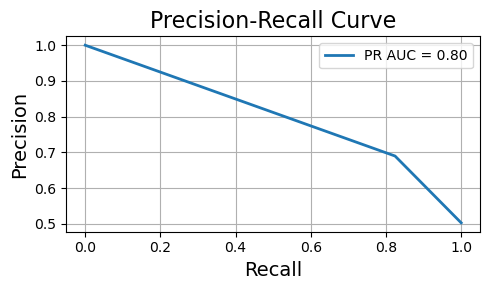

None
Feature Importance Results:
KNeighborsClassifier does not provide feature importance.
None
Evaluate XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...) model
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      3229
    

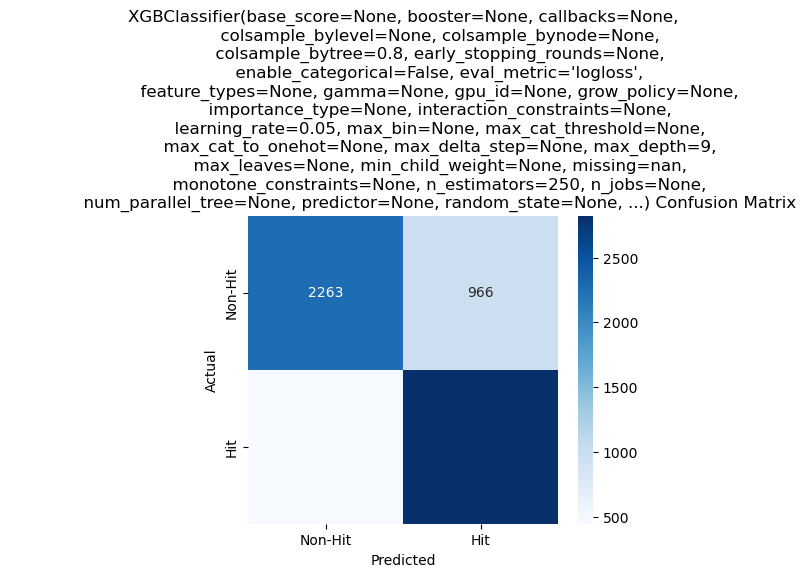

None
Precision-Recall Curve:


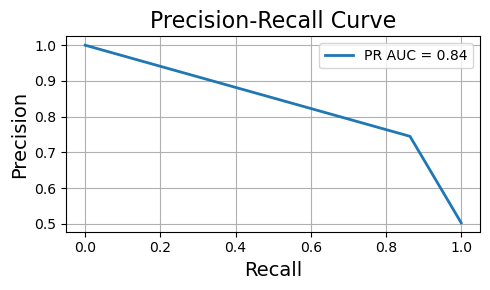

None
Feature Importance Results:
Tree-based Model - Using feature_importances_ for feature importance.
             Feature  Importance
7   instrumentalness    0.231306
6       acousticness    0.088865
3           loudness    0.069644
11       duration_ms    0.067895
1             energy    0.063161
13              year    0.062340
0       danceability    0.061486
12    time_signature    0.060489
5        speechiness    0.055767
4               mode    0.055053
9            valence    0.052940
8           liveness    0.046444
10             tempo    0.044747
2                key    0.039863
None


In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read in test data
def read_split_data(filepath_xtest, filepath_ytest):
    X_test_scaled = pd.read_csv(filepath_xtest)
    y_test = pd.read_csv(filepath_ytest).squeeze()
    return X_test_scaled, y_test

def load_pretrained_models(lr_filepath, rf_filepath, knn_filepath, xgb_filepath):
    logistic_regression = joblib.load(lr_filepath)
    random_forest = joblib.load(rf_filepath)
    knn = joblib.load(knn_filepath)
    xgboost = joblib.load(xgb_filepath)
    return logistic_regression, random_forest, knn, xgboost

def plot_confusion_matrix(y_test, predictions, model, labels=['Non-Hit', 'Hit']):
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_precision_recall_curve(y_test, predictions, title='Precision-Recall Curve'):
    precision, recall, thresholds = precision_recall_curve(y_test, predictions)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(5, 3))
    plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', linewidth=2)
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def print_feature_importance(model, column_names):
    # Logistic regression has coefficients
    if hasattr(model, 'coef_'):
        print("Logistic Regression - Using coef_ for feature importance.")
        importance = model.coef_[0] / np.sum(np.abs(model.coef_[0]))
        feature_importance_df = pd.DataFrame({
            'Feature': column_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        print(feature_importance_df)
    # RandomForest and XGBoost have feature importance
    elif hasattr(model, 'feature_importances_'):
        print("Tree-based Model - Using feature_importances_ for feature importance.")
        importance = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': column_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        print(feature_importance_df)
    # KNN doesn't have extractable feature importance
    else:
        print(f"{type(model).__name__} does not provide feature importance.")

    
def evaluate_model(model, X_test_scaled, y_test, column_names):
    predictions = model.predict(X_test_scaled)
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix Results:")
    print(plot_confusion_matrix(y_test, predictions, model, labels=['Non-Hit', 'Hit']))
    print("Precision-Recall Curve:")
    print(plot_precision_recall_curve(y_test, predictions, title='Precision-Recall Curve'))
    print('Feature Importance Results:')
    print(print_feature_importance(model, column_names))  

    
# Main pipeline execution
def main():
    X_test_scaled, y_test = read_split_data('../data/final/X_test_scaled.csv', 
                                                                     '../data/final/y_test.csv' )
    
    logistic_regression, random_forest, knn, xgboost = load_pretrained_models('../models/logistic_regression_model.pkl',
                                                                                '../models/random_forest_model.pkl', 
                                                                                '../models/knn_model.pkl',
                                                                                '../models/xgboost_model.pkl')
    column_names = (pd.read_csv('../data/final/X_test_scaled.csv')).columns.tolist()
    models = [logistic_regression, random_forest, knn, xgboost]
    for model in models:
        print(f"Evaluate {model} model")
        evaluate_model(model, X_test_scaled, y_test, column_names)

if __name__ == '__main__':
    main()